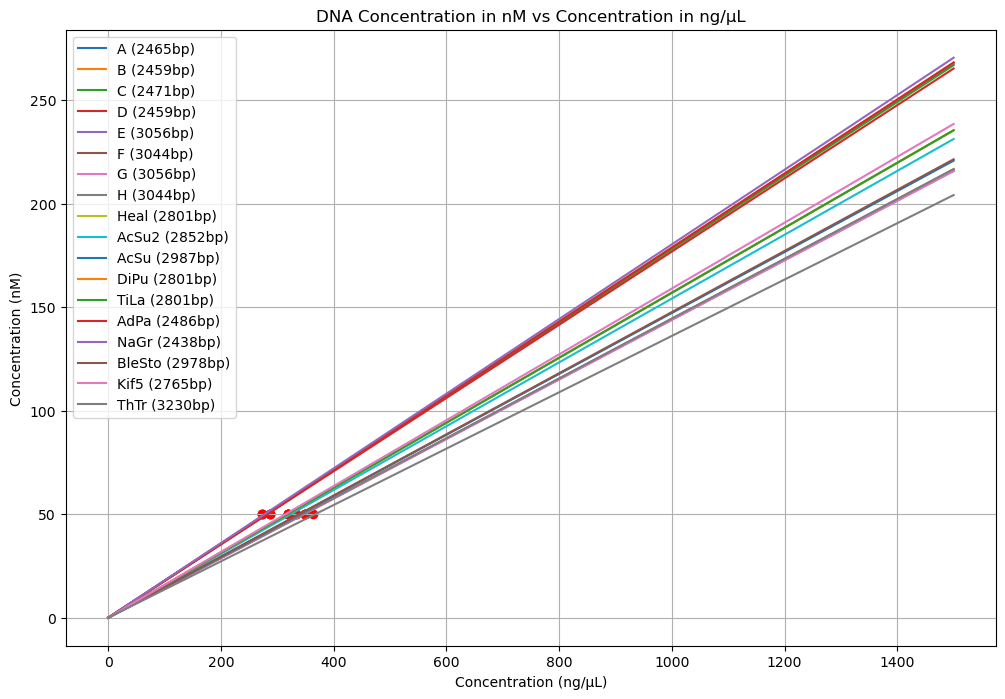

   Construct  Concentration (ng/µL)
0          A             287.878788
1          B             272.727273
2          C             287.878788
3          D             272.727273
4          E             348.484848
5          F             348.484848
6          G             348.484848
7          H             348.484848
8       Heal             318.181818
9      AcSu2             318.181818
10      AcSu             333.333333
11      DiPu             318.181818
12      TiLa             318.181818
13      AdPa             287.878788
14      NaGr             272.727273
15    BleSto             333.333333
16      Kif5             318.181818
17      ThTr             363.636364


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_dna_concentration_with_50nM_marker(constructs, drop_volume=7):
    # Define constants
    average_mw_per_bp = 650
    volume_ul = 2e6  # Volume of 1 liter in microliters

    # Generate concentration range
    concentration_range_ng_per_ul = np.linspace(0, 1500, 100)  # ng/µL range
    
    # Prepare the plot
    plt.figure(figsize=(12, 8))

    # Iterate over each construct
    table_data = []
    
    for construct, size_bp in constructs.items():
        # Calculate concentrations in nM for the given range
        concentration_nM_values = []
        for conc_ng_per_ul in concentration_range_ng_per_ul:
            concentration_g_per_l = conc_ng_per_ul * 1e-6  # Convert ng/µL to g/L
            molecular_weight = size_bp * average_mw_per_bp  # Molecular weight of the DNA (g/mol)
            concentration_m = concentration_g_per_l / molecular_weight  # Concentration in moles per liter (M)
            concentration_nM = (concentration_m * volume_ul * 1e6) / drop_volume  # Convert to nM and adjust by drop volume
            concentration_nM_values.append(concentration_nM)

        # Plot the result for this construct
        plt.plot(concentration_range_ng_per_ul, concentration_nM_values, label=f'{construct} ({size_bp}bp)')
        
        # Find the closest value to 50 nM and mark it
        concentration_nM_values = np.array(concentration_nM_values)
        closest_index = np.argmin(np.abs(concentration_nM_values - 50))
        closest_conc_ng_per_ul = concentration_range_ng_per_ul[closest_index]
        plt.scatter(closest_conc_ng_per_ul, 50, color='red')  # Mark the 50 nM point
        
        # Append the result to the table data
        table_data.append([construct, closest_conc_ng_per_ul])

    # Set plot details
    plt.xlabel('Concentration (ng/µL)')
    plt.ylabel('Concentration (nM)')
    plt.title('DNA Concentration in nM vs Concentration in ng/µL')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and display the table
    df = pd.DataFrame(table_data, columns=["Construct", "Concentration (ng/µL)"])
    print(df)

# Example usage
constructs = {
    'A': 2465,
    'B': 2459,
    'C': 2471,  
    'D': 2459,
    'E': 3056, 
    'F': 3044, 
    'G': 3056,
    'H': 3044,
    'Heal': 2801,
    'AcSu2': 2852, 
    'AcSu': 2987,
    'DiPu': 2801, 
    'TiLa': 2801,
    'AdPa': 2486,
    'NaGr': 2438,
    'BleSto': 2978,
    'Kif5': 2765,
    'ThTr': 3230,
}
plot_dna_concentration_with_50nM_marker(constructs)
